In [11]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

notebook_name = 'most_used_application.ipynb'

current_dir = os.path.dirname(os.path.abspath(notebook_name))
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))


sys.path.insert(1, parent_dir)
from src.data_processer import TelecomDataProcessor


In [2]:
# Replace 'your_conn_params' with your actual connection parameters
conn_params = {
    'host': 'localhost',
    'port': 5432,
    'user': 'ekru',
    'password': 'ekram12345',
    'database': 'tellco',
}

telecom_data_processor = TelecomDataProcessor(conn_params)

In [3]:
df = telecom_data_processor.load_dataset()

/home/ekram/Desktop/week-1/user_analytics_in_the_telecommunication_industry/src/data_processer.py:63: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


In [6]:
cleaned_df = telecom_data_processor.clean_dataset(df)

In [7]:
telecom_data_processor.overview_analysis(cleaned_df)

          BEARER_ID       START_MS         END_MS     DUR._(MS)          IMSI  \
count  1.500010e+05  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean   1.013887e+19     499.661213     499.273526  1.046086e+05  2.082016e+14   
std    2.883600e+18     288.201515     287.687241  8.103735e+04  2.144722e+10   
min    6.917538e+18       1.000000       1.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     251.000000     252.000000  5.744200e+04  2.082014e+14   
50%    7.349883e+18     499.661213     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324300e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/NUMBER          IMEI  AVG_RTT_DL_(MS)  AVG_RTT_UL_(MS)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.188282e+10  4.847455e+13       109.803795        18.280156   
std     2.438731e+12  2.237359e+13       559.341973   

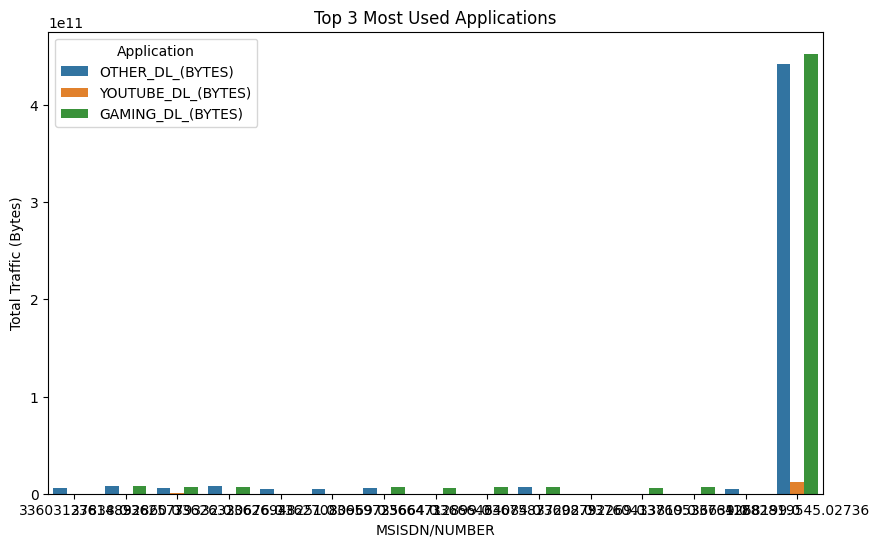

In [12]:
# Create a new DataFrame for total traffic per application
total_traffic_per_app = df.groupby('MSISDN/NUMBER').agg({
    'SOCIAL_MEDIA_DL_(BYTES)': 'sum',
    'SOCIAL_MEDIA_UL_(BYTES)': 'sum',
    'GOOGLE_DL_(BYTES)': 'sum',
    'GOOGLE_UL_(BYTES)': 'sum',
    'EMAIL_DL_(BYTES)':'sum',
    'EMAIL_UL_(BYTES)':'sum', 
    'YOUTUBE_DL_(BYTES)':'sum', 
    'YOUTUBE_UL_(BYTES)':'sum',
    'NETFLIX_DL_(BYTES)':'sum', 
    'NETFLIX_UL_(BYTES)':'sum', 
    'GAMING_DL_(BYTES)':'sum',
    'GAMING_UL_(BYTES)':'sum',
    'OTHER_DL_(BYTES)':'sum', 
    'OTHER_UL_(BYTES)':'sum',
    
}).reset_index()

# Melt the DataFrame to reshape it for easier analysis
melted_df = pd.melt(total_traffic_per_app, id_vars=['MSISDN/NUMBER'], var_name='Application', value_name='Total Traffic (Bytes)')

# Sort and get the top 10 most engaged users per application
top_10_per_app = melted_df.groupby('Application').apply(lambda x: x.nlargest(10, 'Total Traffic (Bytes)')).reset_index(drop=True)

#################################################################################################################################

# Assuming top_10_per_app DataFrame from the previous code
# Know extract the top 3 applications based on total traffic
top_3_applications = top_10_per_app.groupby('Application')['Total Traffic (Bytes)'].sum().nlargest(3).index

# Filter the DataFrame for the top 3 applications
top_3_data = top_10_per_app[top_10_per_app['Application'].isin(top_3_applications)]

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='MSISDN/NUMBER', y='Total Traffic (Bytes)', hue='Application', data=top_3_data)
plt.title('Top 3 Most Used Applications')
plt.xlabel('MSISDN/NUMBER')
plt.ylabel('Total Traffic (Bytes)')
plt.legend(title='Application')
plt.show()